# NLP_Sentiment_Analysis_BTC-ETH

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
import datetime as dt
from collections import Counter
from nltk import ngrams

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jclay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file c:\Users\jclay\anaconda3\envs\pyviz_clone\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file c:\Users\jclay\anaconda3\envs\pyviz_clone\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file c:\Users\jclay\anaconda3\envs\p

In [2]:
# Read your api key environment variable
load_dotenv() # 
api_key = os.getenv('NEWS_API_KEY') # create new variable and set equal to a function. os is a module that allows you to interact with the operating system. Then we pass NEWS_API_KEY to the getenv function.
#os.environ['NEWS_API_KEY']
api_key

'7968e07793034c538e9ee10af1bb7b71'

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key) # create a new variable and set to NewsApiClient. NewsApiClient is a class that allows you to interact with the newsapi.io API. And we pass api_key to the NewsApiClient function.

In [4]:
# Fetch the Bitcoin news articles
articles_btc = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy') # q is the search term, language is the language of the articles, sort_by is the sort order.

In [5]:
# Fetch the Ethereum news articles
articles_eth = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')

In [6]:
# Helper function to create the dataframe 
def create_sentiment_df(news):
    articles = []
    for article in news["articles"]:
        try:
            
            """ # This block of code will be executed for every article in the news api 
            # and defines the parts of the article that we want to include in the df """

            title = article["title"]
            description = article["description"]
            date = article["publishedAt"][:10]
            content = article["content"]
            
            # Create the sentiment and define the properties
            # This block of code will be executed for every article in the news api
            # and will define the sentiment of each article and add it to the df
            sentiment = analyzer.polarity_scores(content)
            compound = sentiment["compound"] # compound is the overall sentiment of the article
            pos = sentiment["pos"] # positive sentiment is extracted from the polarity_scores function
            neu = sentiment["neu"] # neutral sentiment is extracted from the polarity_scores function
            neg = sentiment["neg"] # negative sentiment is extracted from polarity_scores scores
            # Append each articles properties and scores in dictionary format to a list
            articles.append({ 
                "title": title, 
                "description": description,
                "date": date,
                "content": content,
                "compound": compound,
                "pos": pos,
                "neu": neu,
                "neg": neg
            })
        except AttributeError: # except AttributeError is a built in error that is raised when an attribute is not found.
            pass # pass is a keyword that tells python to ignore the error and continue with the code.
    
    return pd.DataFrame(articles) # return the dataframe

In [7]:
# Create the Bitcoin sentiment scores DataFrame
df_btc = create_sentiment_df(articles_btc)
df_btc.head()

,title,description,date,content,compound,pos,neu,neg
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...",2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.964,0.000
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.882,0.061
2,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.772,0.143
3,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.928,0.000
4,Luna Foundation Tried to Prop Up Terra’s Crumb...,"As a kid, I remember when my father tried to u...",2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.833,0.052


In [8]:
# Create the Ethereum sentiment scores DataFrame
df_eth = create_sentiment_df(articles_eth)
df_eth.head()

,title,description,date,content,compound,pos,neu,neg
0,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.865,0.000
1,GameStop Dunks Its Head Into the Crypto Kiddie...,GameStop has officially thrown itself headlong...,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.960,0.040
2,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.879,0.075
3,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.945,0.055
4,GameStop Launching Digital Wallet for Cryptocu...,The self-custodial Ethereum wallet will have i...,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.954,0.000


In [9]:
# Describe the Bitcoin Sentiment
df_btc.describe()

,compound,pos,neu,neg
count,20.000000,20.000000,20.000000,20.000000
mean,-0.119220,0.063350,0.851800,0.084900
std,0.404397,0.060985,0.100743,0.075734
min,-0.859300,0.000000,0.557000,0.000000
25%,-0.386825,0.000000,0.827000,0.057250
50%,-0.284600,0.055000,0.878000,0.071500
75%,0.156025,0.085000,0.923000,0.103750
max,0.750600,0.202000,0.964000,0.300000


In [10]:
# Describe the Ethereum Sentiment
df_eth.describe()

,compound,pos,neu,neg
count,20.000000,20.000000,20.000000,20.000000
mean,-0.088800,0.032800,0.918700,0.048600
std,0.343530,0.051042,0.051321,0.043472
min,-0.690800,0.000000,0.822000,0.000000
25%,-0.284450,0.000000,0.875500,0.000000
50%,-0.153100,0.000000,0.935000,0.050000
75%,0.045025,0.051750,0.955000,0.069000
max,0.690800,0.178000,1.000000,0.178000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC has a mean positive score of .633, which is higher than ETH's. 

Q: Which coin had the highest compound score?

A: BTC has a compound score of .75, which is higher than ETH's. 

Q. Which coin had the highest positive score?

A: BTC has a positive score of .202, which is higher than ETH's. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
nltk.download('stopwords')
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'say', 'sent', 'go', 'wa', 'k', 'u', 'week', 'x', 'also', 'char','ha', 'th', 'b'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jclay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean = regex.sub("", text)
    
    # Create a tokenized list of the words
    words = word_tokenize(clean)
    
    # Lemmatize words into root words
    lemmatized = [lemmatizer.lemmatize(word) for word in words] 
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lemmatized if word.lower() not in sw]
    
    return tokens

In [14]:
nltk.download('punkt')
nltk.download('wordnet')
btc_tokenized = []

for i in articles_btc["articles"]:
    article = i["content"]
    btc_tokenized.append(tokenizer(article))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jclay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jclay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Create nested list of tokenized words from each article
# ETH
eth_tokenized = []

for i in articles_eth["articles"]:
    article = i["content"]
    eth_tokenized.append(tokenizer(article))

In [16]:
# Create a new tokens column for Bitcoin
df_btc["tokens"] = btc_tokenized

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(df_btc
.content.str.cat()), N)
Counter(grams).most_common(20)

[(('reuters', 'bitcoin'), 4),
 (('charsmay', 'reuters'), 4),
 (('previous', 'closebitcoin'), 3),
 (('closebitcoin', 'world'), 3),
 (('world', 'biggest'), 3),
 (('biggest', 'bestknown'), 3),
 (('bestknown', 'cryptocurrency'), 3),
 (('new', 'blockchain'), 3),
 (('seth', 'greens'), 3),
 (('losing', 'previous'), 2),
 (('interest', 'rate'), 2),
 (('blockchain', 'new'), 2),
 (('new', 'luna'), 2),
 (('luna', 'token'), 2),
 (('greens', 'animated'), 2),
 (('animated', 'show'), 2),
 (('show', 'starring'), 2),
 (('starring', 'stolen'), 2),
 (('stolen', 'nft'), 2),
 (('nft', 'air'), 2)]

In [19]:
# Generate the Ethereum N-grams where N=2
grams = ngrams(tokenizer(df_eth.content.str.cat()), N)
Counter(grams).most_common(20)

[(('charsmay', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3),
 (('previous', 'closebitcoin'), 3),
 (('closebitcoin', 'world'), 3),
 (('world', 'biggest'), 3),
 (('biggest', 'bestknown'), 3),
 (('bestknown', 'cryptocurrency'), 3),
 (('yacht', 'club'), 2),
 (('lite', 'hash'), 2),
 (('hash', 'rate'), 2),
 (('graphic', 'card'), 2),
 (('losing', 'previous'), 2),
 (('last', 'week'), 2),
 (('charsthe', 'cryptocurrency'), 2),
 (('cryptocurrency', 'boom'), 2),
 (('boom', 'past'), 2),
 (('past', 'year'), 2),
 (('year', 'ha'), 2),
 (('ha', 'helped'), 2),
 (('helped', 'propel'), 2)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    flat_list = []
    for sublist in tokens:
        for item in sublist:
            flat_list.append(item)
    return Counter(flat_list).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
print("The top 10 words used in the Bitcoin articles are: ")
btc_top_10 = token_count(btc_tokenized)
btc_top_10

The top 10 words used in the Bitcoin articles are: 


[('char', 19),
 ('cryptocurrency', 10),
 ('bitcoin', 9),
 ('world', 6),
 ('week', 6),
 ('new', 6),
 ('blockchain', 5),
 ('may', 5),
 ('reuters', 5),
 ('investor', 4)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
print("The top 10 words used in the Ethereum articles are: ")
eth_top_10 = token_count(eth_tokenized)
eth_top_10

The top 10 words used in the Ethereum articles are: 


[('char', 20),
 ('cryptocurrency', 11),
 ('ha', 8),
 ('may', 6),
 ('bitcoin', 6),
 ('ethereum', 5),
 ('nft', 5),
 ('last', 5),
 ('world', 5),
 ('digital', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
#!pip install wordcloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from wordcloud import WordCloud

In [30]:
# Word cloud generator function
def generate_cloud(words):
    # Turn nested list into flat list
    flat_list = []
    for sublist in words:
        for item in sublist:
            flat_list.append(item)
    # Generate word cloud
    wc = WordCloud().generate(" ".join(flat_list))
    return plt.imshow(wc)

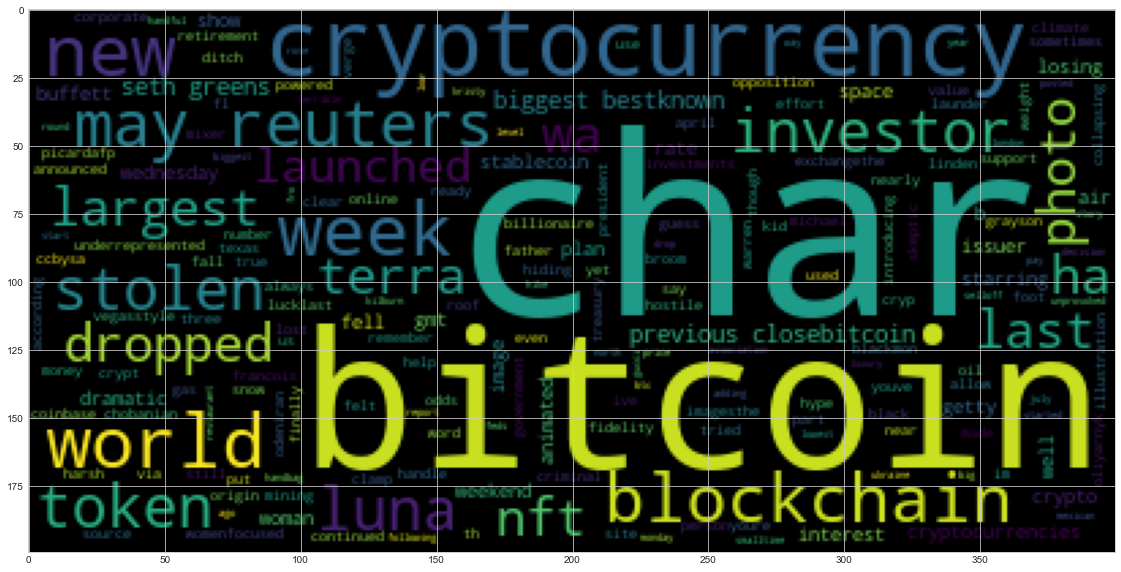

In [31]:
# Generate the Bitcoin word cloud
generate_cloud(btc_tokenized)

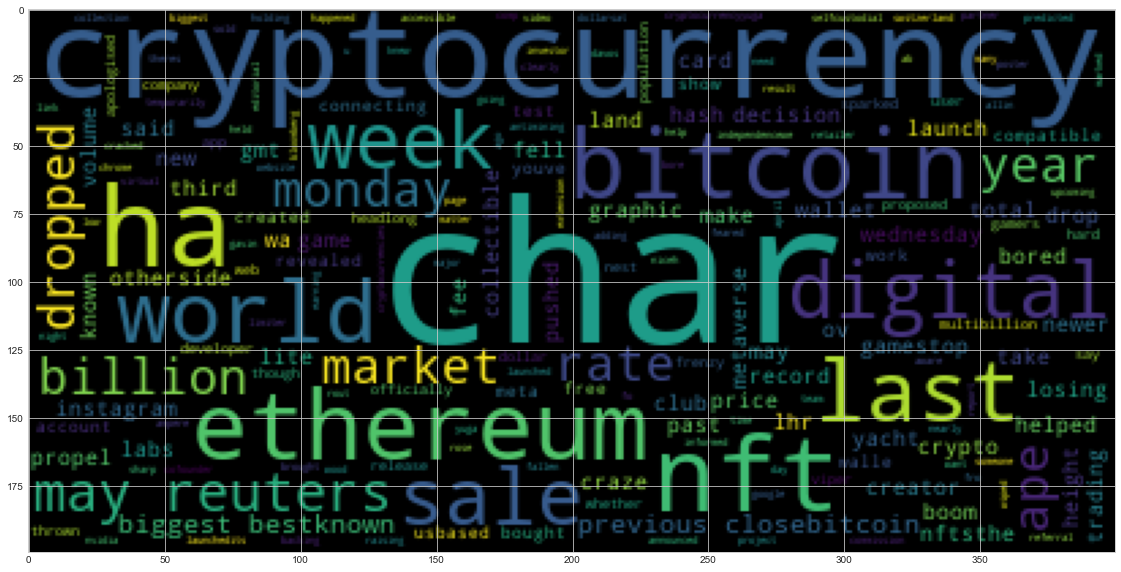

In [32]:
# Generate the Ethereum word cloud
generate_cloud(eth_tokenized)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
concat_btc = df_btc.content.str.cat()

In [37]:
# Run the NER processor on all of the text
btc_ner = nlp(concat_btc)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [38]:
# Render the visualization
displacy.render(btc_ner, style = "ent")

In [ ]:
# List all Entities
for i in btc_ner.ents:
    print(i.text, i.label_)

---

### Ethereum NER

In [40]:
# Concatenate all of the Ethereum text together
concat_eth = df_eth.content.str.cat()

In [41]:
# Run the NER processor on all of the text
eth_ner = nlp(concat_eth)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [42]:
# Render the visualization
displacy.render(eth_ner, style="ent")

In [43]:
# List all Entities
for i in eth_ner.ents:
    print(i.text, i.label_)

Meta ORG
Instagram ORG
US GPE
Instagram ORG
chars]GameStop ORG
web3 LOC
Ethereum ORG
Yuga Labs PERSON
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
Last night TIME
Bloomberg GPE
nearly a third CARDINAL
a billion dollars MONEY
IndependenceWe NORP
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
4 CARDINAL
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
+361 chars]May 9 ORG
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
8 CARDINAL
Nvidia ORG
LHR ORG
last year  DATE
NFT ORG
Ethereum ORG
Last week DATE
last July DATE
33,000 MONEY
the week DATE
last week DAT

---